In [66]:
import mysql.connector
import stuff
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

In [67]:
cnx = mysql.connector.connect(
    host = stuff.host,
    user = stuff.user,
    passwd = stuff.password)

In [68]:
cursor = cnx.cursor()

In [69]:
cnx.database = 'nyc_public_high_schools_grad_rate'

In [70]:
cursor.execute("""SELECT
nyc_public_high_schools_grad_rate.gradrate.school_name,
nyc_public_high_schools_grad_rate.gradrate.percent_graduated
FROM nyc_public_high_schools_grad_rate.gradrate 
JOIN nyc_public_high_schools_grad_rate.regents 
ON nyc_public_high_schools_grad_rate.regents.school_name=nyc_public_high_schools_grad_rate.gradrate.school_name
WHERE nyc_public_high_schools_grad_rate.gradrate.demographic= 'All Students' AND
nyc_public_high_schools_grad_rate.gradrate.cohort = '4 year June';""")

In [71]:
df = pd.DataFrame(cursor.fetchall())
df.columns = [x[0] for x in cursor.description]
df.dropna(inplace = True)

In [72]:
df

,school_name,percent_graduated
0,ORCHARD COLLEGIATE ACADEMY,66.7
1,ORCHARD COLLEGIATE ACADEMY,66.7
2,ORCHARD COLLEGIATE ACADEMY,66.7
3,ORCHARD COLLEGIATE ACADEMY,66.7
4,ORCHARD COLLEGIATE ACADEMY,66.7
5,ORCHARD COLLEGIATE ACADEMY,66.7
6,ORCHARD COLLEGIATE ACADEMY,66.7
7,ORCHARD COLLEGIATE ACADEMY,66.7
8,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,89.7
9,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,89.7


In [73]:
gradrate=df.drop_duplicates(keep = 'first')

In [74]:
gradrate

,school_name,percent_graduated
0,ORCHARD COLLEGIATE ACADEMY,66.7
8,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,89.7
19,EAST SIDE COMMUNITY SCHOOL,89.9
23,FORSYTH SATELLITE ACADEMY,14.9
29,MARTA VALLE HIGH SCHOOL,66.1
38,LOWER EAST SIDE PREPARATORY HIGH SCHOOL,35.8
47,CASCADES HIGH SCHOOL,23.6
54,BARD HIGH SCHOOL EARLY COLLEGE,94.7
61,47 THE AMERICAN SIGN LANGUAGE AND ENGLISH SECO...,91.4
70,THE URBAN ASSEMBLY SCHOOL FOR EMERGENCY MANAGE...,67.0


In [75]:
cursor.execute("""SELECT * FROM nyc_public_high_schools_grad_rate.attendance;""")

In [76]:
attendance = pd.DataFrame(cursor.fetchall())
attendance.columns = [x[0] for x in cursor.description]
attendance.dropna(inplace = True)

In [77]:
attendance.to_csv('attendance_real.csv')

In [78]:
gradrate_attendance= gradrate.set_index('school_name').join(attendance.set_index('school_name'))


In [79]:
gradrate_attendance
gradrate_attendance.dropna(inplace = True)

In [80]:
gradrate_attendance.to_csv('gradrate_attendance_lin')

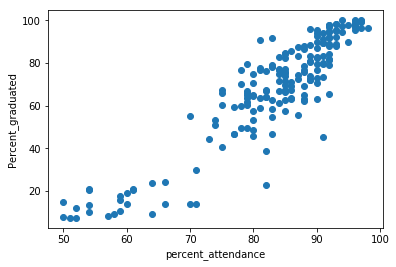

None
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     2994.
Date:                Fri, 17 Jan 2020   Prob (F-statistic):          1.30e-116
Time:                        10:34:12   Log-Likelihood:                -827.74
No. Observations:                 187   AIC:                             1657.
Df Residuals:                     186   BIC:                             1661.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.1192      0.020     54.721    

In [83]:
plt.scatter(list(gradrate_attendance['attendance']),list(gradrate_attendance['percent_graduated']))
plt.xlabel('percent_attendance')
plt.ylabel('Percent_graduated')
print(plt.show())
x=sm.OLS(list(gradrate_attendance['attendance']),list(gradrate_attendance['percent_graduated']))
results = x.fit()
print(results.summary())
print(stats.pearsonr(list(gradrate_attendance['attendance']),list(gradrate_attendance['percent_graduated'])))

In [62]:
x=sm.OLS(list(gradrate_attendance['attendance']),list(gradrate_attendance['percent_graduated']))
results = x.fit()
print(results.summary())
print(stats.pearsonr(list(gradrate_attendance['attendance']),list(gradrate_attendance['percent_graduated'])))


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     2994.
Date:                Thu, 16 Jan 2020   Prob (F-statistic):          1.30e-116
Time:                        17:27:14   Log-Likelihood:                -827.74
No. Observations:                 187   AIC:                             1657.
Df Residuals:                     186   BIC:                             1661.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.1192      0.020     54.721      0.0

In [22]:
x=sm.OLS(list(gradrate_attendance['attendance']),list(gradrate_attendance['percent_graduated']))
results = x.fit()
print(results.summary())
print(stats.pearsonr(list(gradrate_attendance['attendance']),list(gradrate_attendance['percent_graduated'])))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     2994.
Date:                Thu, 16 Jan 2020   Prob (F-statistic):          1.30e-116
Time:                        10:29:31   Log-Likelihood:                -827.74
No. Observations:                 187   AIC:                             1657.
Df Residuals:                     186   BIC:                             1661.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.1192      0.020     54.721      0.0

In [84]:
cursor.execute("""SELECT * FROM nyc_public_high_schools_grad_rate.teacher_qualifications;""")

In [85]:
teacher_qualifications = pd.DataFrame(cursor.fetchall())
teacher_qualifications.columns = [x[0] for x in cursor.description]
teacher_qualifications.dropna(inplace = True)

In [86]:
teacher_qualifications.to_csv('teacher_qualifications_lin.csv')

In [87]:
gradrate_teacher= gradrate.set_index('school_name').join(teacher_qualifications.set_index('school_name'))


In [88]:
gradrate_teacher.dropna(inplace = True)

In [89]:
gradrate_teacher

,percent_graduated,percent_with_no_valid_teaching_ceriticate,percent_teaching_out_of_certificate,percent_with_less_than_3_yrs_experience,percent_with_masters_and_30yrs_or_Doctorate,total_number_of_classes,percent_taught_by_teachers_without_appropriate_certificate
school_name,,,,,,,
ORCHARD COLLEGIATE ACADEMY,66.7,6.0,44.0,33.0,6.0,102.0,40.0
UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,89.7,0.0,13.0,25.0,25.0,112.0,10.0
EAST SIDE COMMUNITY SCHOOL,89.9,0.0,64.0,7.0,57.0,268.0,47.0
MARTA VALLE HIGH SCHOOL,66.1,0.0,0.0,25.0,31.0,68.0,0.0
CASCADES HIGH SCHOOL,23.6,0.0,14.0,21.0,36.0,112.0,4.0
BARD HIGH SCHOOL EARLY COLLEGE,94.7,0.0,13.0,6.0,71.0,171.0,9.0
PACE HIGH SCHOOL,79.3,0.0,24.0,12.0,47.0,140.0,19.0
FOOD AND FINANCE HIGH SCHOOL,88.4,0.0,0.0,13.0,50.0,110.0,2.0
ESSEX STREET ACADEMY,82.5,0.0,19.0,4.0,26.0,124.0,28.0


In [90]:
gradrate_teacher.to_csv('gradrate_teacher_lin.csv')

In [91]:
gradrate_teacher

,percent_graduated,percent_with_no_valid_teaching_ceriticate,percent_teaching_out_of_certificate,percent_with_less_than_3_yrs_experience,percent_with_masters_and_30yrs_or_Doctorate,total_number_of_classes,percent_taught_by_teachers_without_appropriate_certificate
school_name,,,,,,,
ORCHARD COLLEGIATE ACADEMY,66.7,6.0,44.0,33.0,6.0,102.0,40.0
UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,89.7,0.0,13.0,25.0,25.0,112.0,10.0
EAST SIDE COMMUNITY SCHOOL,89.9,0.0,64.0,7.0,57.0,268.0,47.0
MARTA VALLE HIGH SCHOOL,66.1,0.0,0.0,25.0,31.0,68.0,0.0
CASCADES HIGH SCHOOL,23.6,0.0,14.0,21.0,36.0,112.0,4.0
BARD HIGH SCHOOL EARLY COLLEGE,94.7,0.0,13.0,6.0,71.0,171.0,9.0
PACE HIGH SCHOOL,79.3,0.0,24.0,12.0,47.0,140.0,19.0
FOOD AND FINANCE HIGH SCHOOL,88.4,0.0,0.0,13.0,50.0,110.0,2.0
ESSEX STREET ACADEMY,82.5,0.0,19.0,4.0,26.0,124.0,28.0


In [92]:
teacher_qualifications

,school_name,percent_with_no_valid_teaching_ceriticate,percent_teaching_out_of_certificate,percent_with_less_than_3_yrs_experience,percent_with_masters_and_30yrs_or_Doctorate,total_number_of_classes,percent_taught_by_teachers_without_appropriate_certificate
0,BARD HIGH SCHOOL EARLY COLLEGE,0,13,6,71,171,9
1,CASCADES HIGH SCHOOL,0,14,21,36,112,4
2,EAST SIDE COMMUNITY SCHOOL,0,64,7,57,268,47
3,FORSYTHE SATELLITE ACADEMY,0,0,25,38,20,5
4,LOWER EAST SIDE PREP HIGH SCHOOL,0,44,9,63,189,24
5,MARTA VALLE HIGH SCHOOL,0,0,25,31,68,0
6,"NEW EXPLORATIONS SCI, TECH & MATH",1,17,21,32,515,12
7,ORCHARD COLLEGIATE ACADEMY,6,44,33,6,102,40
8,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,0,13,25,25,112,10
9,ACADEMY FOR SOFTWARE ENGINEERING,6,29,18,26,147,31


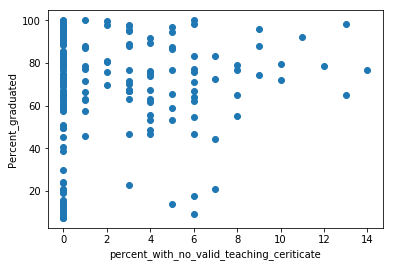

None
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     88.57
Date:                Fri, 17 Jan 2020   Prob (F-statistic):           1.89e-17
Time:                        10:35:22   Log-Likelihood:                -480.85
No. Observations:                 187   AIC:                             963.7
Df Residuals:                     186   BIC:                             966.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0301      0.003      9.411    

In [94]:
plt.scatter(list(gradrate_teacher['percent_with_no_valid_teaching_ceriticate']),list(gradrate_teacher['percent_graduated']))
plt.xlabel('percent_with_no_valid_teaching_ceriticate')
plt.ylabel('Percent_graduated')
print(plt.show())
x=sm.OLS(list(gradrate_teacher['percent_with_no_valid_teaching_ceriticate']),list(gradrate_teacher['percent_graduated']))
results = x.fit()
print(results.summary())
print(stats.pearsonr(list(gradrate_teacher['percent_with_no_valid_teaching_ceriticate']),list(gradrate_teacher['percent_graduated'])))

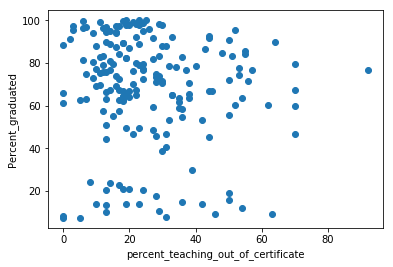

None
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     275.6
Date:                Fri, 17 Jan 2020   Prob (F-statistic):           1.46e-38
Time:                        10:37:25   Log-Likelihood:                -821.12
No. Observations:                 187   AIC:                             1644.
Df Residuals:                     186   BIC:                             1647.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3277      0.020     16.602    

In [95]:
plt.scatter(list(gradrate_teacher['percent_teaching_out_of_certificate']),list(gradrate_teacher['percent_graduated']))
plt.xlabel('percent_teaching_out_of_certificate')
plt.ylabel('Percent_graduated')
print(plt.show())
x=sm.OLS(list(gradrate_teacher['percent_teaching_out_of_certificate']),list(gradrate_teacher['percent_graduated']))
results = x.fit()
print(results.summary())
print(stats.pearsonr(list(gradrate_teacher['percent_teaching_out_of_certificate']),list(gradrate_teacher['percent_graduated'])))

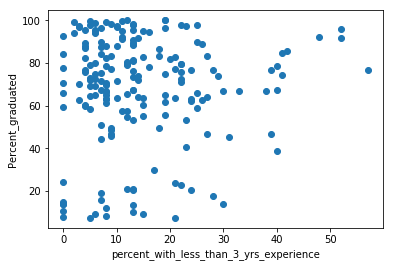

None
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     240.1
Date:                Fri, 17 Jan 2020   Prob (F-statistic):           2.59e-35
Time:                        10:38:26   Log-Likelihood:                -730.59
No. Observations:                 187   AIC:                             1463.
Df Residuals:                     186   BIC:                             1466.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1885      0.012     15.494    

In [96]:
plt.scatter(list(gradrate_teacher['percent_with_less_than_3_yrs_experience']),list(gradrate_teacher['percent_graduated']))
plt.xlabel('percent_with_less_than_3_yrs_experience')
plt.ylabel('Percent_graduated')
print(plt.show())
x=sm.OLS(list(gradrate_teacher['percent_with_less_than_3_yrs_experience']),list(gradrate_teacher['percent_graduated']))
results = x.fit()
print(results.summary())
print(stats.pearsonr(list(gradrate_teacher['percent_with_less_than_3_yrs_experience']),list(gradrate_teacher['percent_graduated'])))

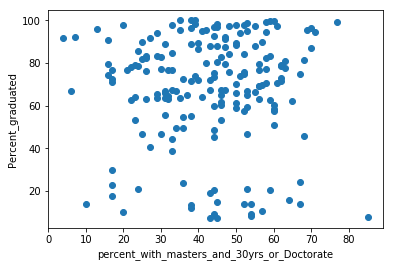

None
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     646.8
Date:                Fri, 17 Jan 2020   Prob (F-statistic):           1.88e-62
Time:                        10:39:49   Log-Likelihood:                -839.40
No. Observations:                 187   AIC:                             1681.
Df Residuals:                     186   BIC:                             1684.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5536      0.022     25.432    

In [97]:
plt.scatter(list(gradrate_teacher['percent_with_masters_and_30yrs_or_Doctorate']),list(gradrate_teacher['percent_graduated']))
plt.xlabel('percent_with_masters_and_30yrs_or_Doctorate')
plt.ylabel('Percent_graduated')
print(plt.show())
x=sm.OLS(list(gradrate_teacher['percent_with_masters_and_30yrs_or_Doctorate']),list(gradrate_teacher['percent_graduated']))
results = x.fit()
print(results.summary())
print(stats.pearsonr(list(gradrate_teacher['percent_with_masters_and_30yrs_or_Doctorate']),list(gradrate_teacher['percent_graduated'])))

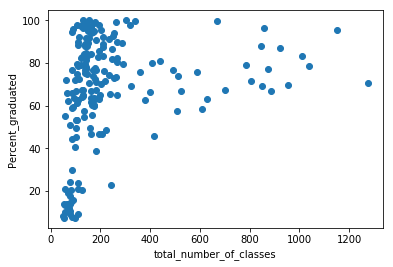

None
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     214.2
Date:                Fri, 17 Jan 2020   Prob (F-statistic):           8.97e-33
Time:                        10:41:33   Log-Likelihood:                -1277.0
No. Observations:                 187   AIC:                             2556.
Df Residuals:                     186   BIC:                             2559.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.3074      0.226     14.636    

In [98]:
plt.scatter(list(gradrate_teacher['total_number_of_classes']),list(gradrate_teacher['percent_graduated']))
plt.xlabel('total_number_of_classes')
plt.ylabel('Percent_graduated')
print(plt.show())
x=sm.OLS(list(gradrate_teacher['total_number_of_classes']),list(gradrate_teacher['percent_graduated']))
results = x.fit()
print(results.summary())
print(stats.pearsonr(list(gradrate_teacher['total_number_of_classes']),list(gradrate_teacher['percent_graduated'])))

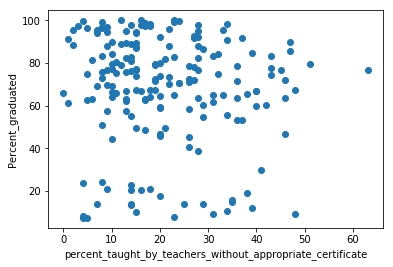

None
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     314.4
Date:                Fri, 17 Jan 2020   Prob (F-statistic):           7.90e-42
Time:                        10:42:38   Log-Likelihood:                -769.34
No. Observations:                 187   AIC:                             1541.
Df Residuals:                     186   BIC:                             1544.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2654      0.015     17.730    

In [99]:
plt.scatter(list(gradrate_teacher['percent_taught_by_teachers_without_appropriate_certificate']),list(gradrate_teacher['percent_graduated']))
plt.xlabel('percent_taught_by_teachers_without_appropriate_certificate')
plt.ylabel('Percent_graduated')
print(plt.show())
x=sm.OLS(list(gradrate_teacher['percent_taught_by_teachers_without_appropriate_certificate']),list(gradrate_teacher['percent_graduated']))
results = x.fit()
print(results.summary())
print(stats.pearsonr(list(gradrate_teacher['percent_taught_by_teachers_without_appropriate_certificate']),list(gradrate_teacher['percent_graduated'])))